<div style='float: right'><img src='pic/nonogram.png'/></div>

## <div id='nonogram' />ののぐらむ

In [1]:
#!pip3 install pulp ortoolpy
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from pulp import LpProblem, lpSum, value
from ortoolpy import addvars, addbinvars
hinth = [[int(s) for s in t.split(',')] for t in
         '2 3,2 2,3 2,2 8 7 1,4 3,3 1,1 3'.split()]
hintv = [[int(s) for s in t.split(',')] for t in
         '2 1,2 1,5 5,2 1,2,1 3 6 1,3,2,1 3,4 1,1'.split()]

### 問題
* 各横行の左、各縦列の上にある数字は、その行(列)の中で連続して黒く塗る白マスの数を表します
* 1つの行(列)に対して数字が複数ある場合は、数字の並び順どおりにその数字の数だけ連続して黒く塗ります
* 1 つの行(列)に対して数字が複数ある場合は、その数字が表す黒マスの連続の間に1マス以上の白マス(塗らないマス) が入ります

### 定式化
\begin{array}{cl}
            変数 & v_{ij} \in \{0, 1\} ~ \forall i, j ~ ~ ~ マスi,jが黒かどうか (1) \\
                 & r_{k} \in \{0, 1\} ~ \forall k, 縦または横 ~ ~ ~ ~ ~ 縦または横ごとにk番目の候補を選ぶかどうか (2) \\
\mbox{subject to} & \sum_k{r_k} = 1 ~ \forall 縦または横 ~ ~ ~ ~ 縦または横ごとに候補の中から1つ (3) \\
                 & 候補を選んだらマスの色は候補の通り (4) \\
\end{array}

In [2]:
def baselist(i, j, k):
    return [0] * i + [1] * j + [0] * k
def makelist(n, l):
    p = l[-1]
    if len(l) == 1:
        if n < p: return None
        return [baselist(i, p, n - p - i) for i in range(n - p + 1)]
    ll = l[:-1]
    s = sum(ll) + len(ll) - 1
    return [j + baselist(1, p, n - p - s - i - 1) \
        for i in range(n - p - s) for j in makelist(i + s, ll)]
def do(m, v, hint):
    for i, hh in enumerate(hint):
        l = makelist(v.shape[0], hh)
        r = addbinvars(len(l)) # (2)
        m += lpSum(r) == 1 # (3)
        for j, c in enumerate(l):
            for k, b in enumerate(c):
                m += (1 - 2 * b) * v[k,i] <= 1 - b - r[j] # (4)
m = LpProblem()
v = np.array(addvars(len(hintv), len(hinth))) # (1)
do(m, v, hinth)
do(m, v.T, hintv)
m.solve()

1

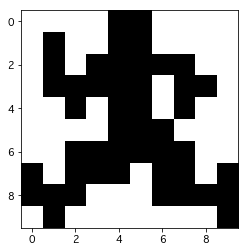

In [3]:
plt.imshow(1-np.vectorize(value)(v), cmap='gray', interpolation='none');